In [1]:
#reading cleaned dataset
import pandas as pd
csv = './reddit_text_sentiment.csv'
reddit_df = pd.read_csv(csv,index_col=0)
reddit_df.head()

/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,num_comments,score,created_utc,subreddit,text,compound,positive,neutral,negative
0,0,3,1201232574,microsoft,windows in be careful what you wish for,0.5106,0.417,0.583,0.000
1,0,1,1201327573,microsoft,dueling fools microsoft bear,-0.4939,0.000,0.484,0.516
2,0,0,1202287964,microsoft,windows seven enough already,0.0000,0.000,1.000,0.000
3,0,2,1202341158,microsoft,microsoftyahoo merger a flickr perspective,0.0000,0.000,1.000,0.000
4,0,0,1202398017,microsoft,microsoft steals yahoo,-0.5106,0.000,0.377,0.623


In [2]:
len(reddit_df["subreddit"].unique())

73

In [3]:
len(reddit_df["subreddit"])

4705320

In [4]:
reddit_df["subreddit"] = reddit_df["subreddit"].str.lower()

In [5]:
#combining with three other dataframes to get: Brand company name, Sector, other name
#reading datsets
companies_dataset = pd.read_csv("../TwitterAPI/tables/companies.csv")
index_dataset = pd.read_csv("../TwitterAPI/tables/index_names.csv")
industries_dataset = pd.read_csv("../TwitterAPI/tables/companies_industries.csv")


In [6]:
index_dataset = index_dataset.rename(columns={"company": "subreddit"})
index_dataset["subreddit"] = index_dataset["subreddit"].str.lower()
index_dataset = index_dataset.drop_duplicates(subset ="subreddit", keep = "first") 

In [7]:
reddit_df = reddit_df.merge(index_dataset, on='subreddit', how='left')

,num_comments,score,created_utc,subreddit,text,compound,positive,neutral,negative,company_id,...,ticketname,stockindex,company_name_y,industry_id,industry_name,clean_length,date,week,month,year


In [9]:
reddit_df = reddit_df.merge(companies_dataset, on='index', how='left')

In [10]:
reddit_df = reddit_df.rename(columns={"Company": "company_name", "index": "company_id"})

In [11]:
reddit_df = reddit_df.merge(industries_dataset, on='company_id', how='left')

In [23]:

len(reddit_df["company_name_y"].unique())

30

In [24]:
reddit_df

,num_comments,score,created_utc,subreddit,text,compound,positive,neutral,negative,company_id,...,district,datastart,dataend,nuber,ticketname,stockindex,company_name_y,industry_id,industry_name,clean_length
0,0,3,1201232574,microsoft,windows in be careful what you wish for,0.5106,0.417,0.583,0.000,1,...,WA,1975.0,1986.0,1,MSFT,NASDAQ,Microsoft Corporation,1,Technology,42
1,0,1,1201327573,microsoft,dueling fools microsoft bear,-0.4939,0.000,0.484,0.516,1,...,WA,1975.0,1986.0,1,MSFT,NASDAQ,Microsoft Corporation,1,Technology,29
2,0,0,1202287964,microsoft,windows seven enough already,0.0000,0.000,1.000,0.000,1,...,WA,1975.0,1986.0,1,MSFT,NASDAQ,Microsoft Corporation,1,Technology,29
3,0,2,1202341158,microsoft,microsoftyahoo merger a flickr perspective,0.0000,0.000,1.000,0.000,1,...,WA,1975.0,1986.0,1,MSFT,NASDAQ,Microsoft Corporation,1,Technology,43
4,0,0,1202398017,microsoft,microsoft steals yahoo,-0.5106,0.000,0.377,0.623,1,...,WA,1975.0,1986.0,1,MSFT,NASDAQ,Microsoft Corporation,1,Technology,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4705315,0,1,1584507656,foxnews,how fox rhetoric on covid has shifted,0.0000,0.000,1.000,0.000,35,...,NaN,NaN,NaN,NaN,NaN,NaN,Fox Corporation,5,Cable & Streaming,38
4705316,11,1,1584567961,foxnews,the fox 'news' shuffle must pain fox to put th...,-0.5673,0.033,0.865,0.102,35,...,NaN,NaN,NaN,NaN,NaN,NaN,Fox Corporation,5,Cable & Streaming,723
4705317,40,1,1584595280,foxnews,fox news and our president failing miserably h...,-0.7506,0.000,0.484,0.516,35,...,NaN,NaN,NaN,NaN,NaN,NaN,Fox Corporation,5,Cable & Streaming,76
4705318,0,1,1584661646,foxnews,the five full show trump breaking news march,0.0000,0.000,1.000,0.000,35,...,NaN,NaN,NaN,NaN,NaN,NaN,Fox Corporation,5,Cable & Streaming,49


In [13]:
reddit_df['clean_length'] = [len(t) for t in reddit_df.text]


In [14]:
reddit_df.describe()

,num_comments,score,created_utc,compound,positive,neutral,negative,company_id,Unnamed: 2,Unnamed: 3,datastart,dataend,industry_id,clean_length
count,4.705320e+06,4.705320e+06,4.705320e+06,4.705320e+06,4.705320e+06,4.705320e+06,4.705320e+06,4.705320e+06,0.0,0.0,4.019635e+06,4.019635e+06,4.705320e+06,4.705320e+06
mean,7.873101e+00,1.280195e+01,1.488968e+09,1.604603e-01,1.034655e-01,8.387459e-01,5.489317e-02,5.817344e+00,NaN,NaN,1.983499e+03,1.993110e+03,1.208297e+00,2.513734e+02
std,9.336004e+01,2.052405e+02,7.011724e+07,4.608391e-01,1.397847e-01,1.693781e-01,1.050577e-01,6.837762e+00,NaN,NaN,1.929816e+01,2.239114e+01,7.925916e-01,4.385282e+02
min,-6.000000e+00,0.000000e+00,1.201233e+09,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,1.799000e+03,9.000000e+00,1.000000e+00,1.000000e+00
25%,0.000000e+00,1.000000e+00,1.444141e+09,0.000000e+00,0.000000e+00,7.590000e-01,0.000000e+00,2.000000e+00,NaN,NaN,1.975000e+03,1.980000e+03,1.000000e+00,4.600000e+01
50%,2.000000e+00,1.000000e+00,1.503500e+09,0.000000e+00,5.400000e-02,8.680000e-01,0.000000e+00,3.000000e+00,NaN,NaN,1.976000e+03,1.986000e+03,1.000000e+00,9.700000e+01
75%,6.000000e+00,2.000000e+00,1.545078e+09,5.106000e-01,1.580000e-01,1.000000e+00,7.000000e-02,6.000000e+00,NaN,NaN,1.998000e+03,2.004000e+03,1.000000e+00,3.150000e+02
max,1.127130e+05,6.872400e+04,1.584677e+09,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.210000e+02,NaN,NaN,2.011000e+03,2.018000e+03,5.000000e+00,3.908500e+04


In [15]:
data = reddit_df.groupby(['company_id']).agg(['count'])

In [85]:
data.describe()

,compound_reddit,positive_reddit,negative_reddit,neutral_reddit
count,30.000000,30.000000,30.000000,30.000000
mean,0.139084,0.097450,0.841354,0.060055
std,0.092769,0.017468,0.022231,0.015694
min,-0.080439,0.077200,0.782821,0.033437
25%,0.083541,0.083882,0.831853,0.051671
50%,0.153649,0.090098,0.843838,0.059055
75%,0.191561,0.106231,0.855412,0.066628
max,0.411185,0.138242,0.874822,0.118227


# Comparing Twitter and Reddit Sentiment per company

In [132]:
data = reddit_df[['company_name_y', "compound", "positive", "neutral", "negative"]].groupby(['company_name_y'],as_index=False).agg(['mean'], as_index = False)
data = data.reset_index()
data.columns=["company_name","compound_reddit", "positive_reddit", "negative_reddit", "neutral_reddit"]


In [136]:
data.sort_values(by=['compound_reddit'], ascending=False)

,company_name,compound_reddit,positive_reddit,negative_reddit,neutral_reddit
23,The American Express Company,0.411185,0.118674,0.847889,0.033437
2,"Amazon.com, Inc.",0.241113,0.114493,0.833394,0.051749
20,Spotify Technology S.A.,0.224441,0.137284,0.818602,0.042403
21,Sprint Corporation,0.224025,0.087026,0.867653,0.045120
5,Capital One Financial Corporation,0.216395,0.103542,0.837223,0.059231
26,Verizon Communications Inc.,0.211858,0.080369,0.874120,0.045212
22,T-Mobile US Inc.,0.207389,0.082070,0.874822,0.042880
19,Snap Inc.,0.191616,0.138242,0.796213,0.061587
9,Dell Technologies Inc.,0.191398,0.085546,0.862513,0.051645
14,JPMorgan Chase & Co.,0.189636,0.106669,0.840976,0.052351


In [56]:
#combining reddit data with twitter data
twitter_dataset = pd.read_csv("../TwitterAPI/twitter_sentiment.csv")


/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (10,11,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [326]:
data_2 = twitter_dataset[['company_name', "overall_sentiment", "positive_sentiment", "negative_sentiment", "neutral_sentiment"]].groupby(['company_name']).agg(['mean'])

In [393]:
twitter_dataset_2 = twitter_dataset.copy()

In [394]:
twitter_dataset_2["industry_name"] = twitter_dataset_2["industry_name"].replace({"Consumer Banking": "Banking", 
                     "Pharmacy & Drugs":"Pharmacy", "Food & Beverages": "Food", "Clothing & Apparel": "Clothing"})

,Unnamed: 0,index,hasthag,tweet_text,date,hashtags,retweets,favorites,mentions,company_id,...,company_name,industry_id,industry_name,pre_clean_len,clean_text,clean_length,overall_sentiment,positive_sentiment,neutral_sentiment,negative_sentiment
443085,443085,465511,macy's,maybe this year my mom will stop calling macy'...,2017-01-01 23:52:45+00:00,NaN,14.0,87.0,NaN,53,...,"Macy's, Inc.",7,Retail,57,maybe this year my mom will stop calling macy ...,53,-0.2960,0.000,0.820,0.180
443086,443086,465512,macy's,Macy's always comes through with those good BP...,2017-01-01 22:46:23+00:00,NaN,1.0,6.0,NaN,53,...,"Macy's, Inc.",7,Retail,53,macy always comes through with those good bp p...,51,0.4404,0.266,0.734,0.000
443087,443087,465513,macy's,i saw someone wipe out in macy's and i'm think...,2017-01-01 20:27:58+00:00,NaN,1.0,12.0,NaN,53,...,"Macy's, Inc.",7,Retail,116,saw someone wipe out in macy and thinking whos...,106,-0.0772,0.089,0.809,0.102
443088,443088,465514,macy's,"Also, remember when I broke my necklace after ...",2017-01-01 20:26:02+00:00,NaN,1.0,4.0,@madisonwelch03,53,...,"Macy's, Inc.",7,Retail,132,also remember when broke my necklace after bei...,109,-0.2263,0.084,0.793,0.123
443089,443089,465515,macy's,when u speak tagalog to the filipino lady ring...,2017-01-01 20:20:19+00:00,NaN,0.0,7.0,NaN,53,...,"Macy's, Inc.",7,Retail,112,when speak tagalog to the filipino lady ringin...,104,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053489,2053489,2157579,kroger,I'm so grateful that #Kroger started limiting ...,2020-03-25 02:19:27+00:00,#Kroger,0.0,0.0,NaN,117,...,The Kroger Company,7,Retail,86,so grateful that kroger started limiting the f...,79,-0.0697,0.195,0.593,0.211
2053490,2053490,2157580,kroger,Hey #kroger it would sure be great if you coul...,2020-03-25 02:15:28+00:00,#kroger,0.0,0.0,NaN,117,...,The Kroger Company,7,Retail,177,hey kroger it would sure be great if you could...,163,0.8689,0.271,0.729,0.000
2053491,2053491,2157581,kroger,I Just got back from my raped Indiana #Kroger....,2020-03-25 02:00:03+00:00,#Kroger #floridabeaches #Organic,0.0,0.0,NaN,117,...,The Kroger Company,7,Retail,218,just got back from my raped indiana kroger wow...,186,0.2500,0.218,0.608,0.173
2053492,2053492,2157582,kroger,This is Ridiculous! Any #Kroger employee know ...,2020-03-25 00:33:28+00:00,#Kroger #ShutItDownNow #ShutDownGA,0.0,0.0,NaN,117,...,The Kroger Company,7,Retail,106,this is ridiculous any kroger employee know wh...,101,-0.3612,0.000,0.848,0.152


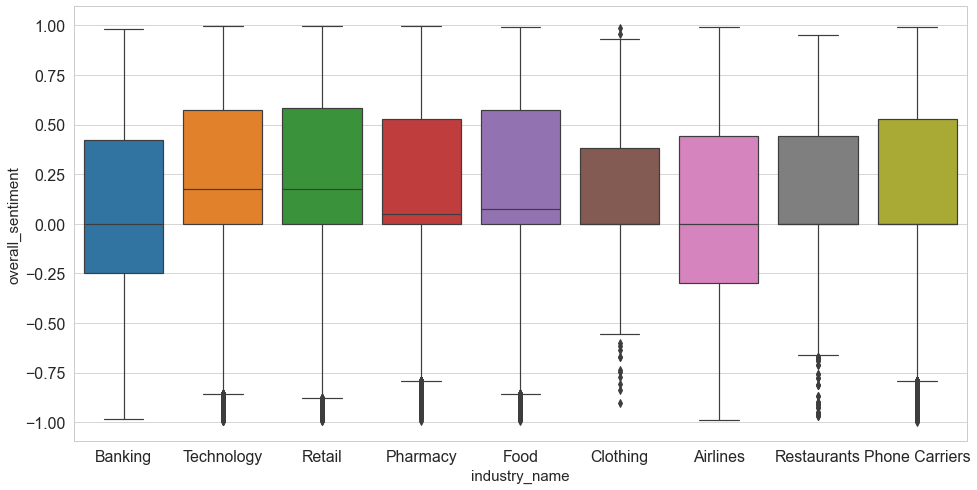

In [398]:
import seaborn as sns
plt.figure(figsize=(16, 8))

sns.set_context("paper", font_scale=1.8, rc={"font.size":20,"axes.labelsize":15})
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'industry_name', y = 'overall_sentiment', data =twitter_dataset_2) 


#twitter_dataset.boxplot(by ='industry_name', column =['overall_sentiment'], grid = False) 


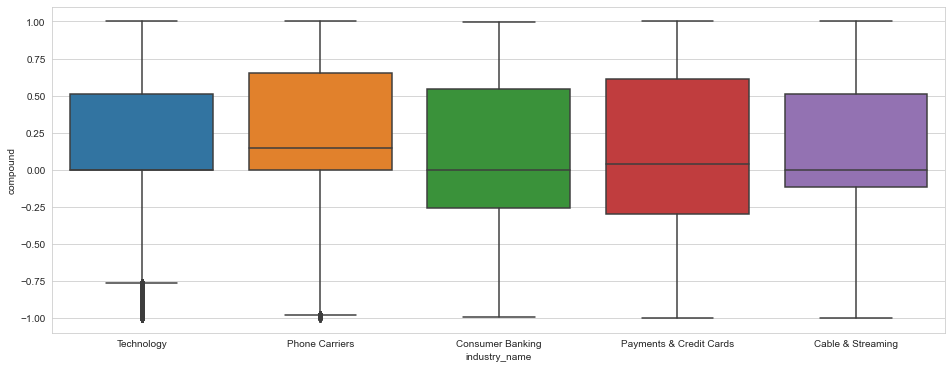

In [341]:
import seaborn as sns
plt.figure(figsize=(16, 6))

sns.set_style("whitegrid") 
  
sns.boxplot(x = 'industry_name', y = 'compound', data = reddit_df) 

#twitter_dataset.boxplot(by ='industry_name', column =['overall_sentiment'], grid = False) 

In [333]:
pip install seaborn

  Using cached https://files.pythonhosted.org/packages/70/bd/5e6bf595fe6ee0f257ae49336dd180768c1ed3d7c7155b2fdf894c1c808a/seaborn-0.10.0-py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [138]:
data = data.rename(columns={"company_name_y": "company_name"})
data_2 = data_2.reset_index()
data_2.columns=["company_name","compound_twitter", "positive_twitter", "negative_twitter", "neutral_twitter"]


In [139]:
data_2.sort_values(by=['compound_twitter'], ascending=False)

,company_name,compound_twitter,positive_twitter,negative_twitter,neutral_twitter
3,"Amazon.com, Inc.",0.369059,0.223519,0.043948,0.732530
25,"Nordstrom, Inc.",0.333174,0.161106,0.024316,0.814577
44,"Tyson Foods, Inc.",0.332340,0.149624,0.031184,0.819176
30,Sprint Corporation,0.286175,0.135387,0.039504,0.825108
32,Target Corporation,0.282543,0.149182,0.035479,0.815339
20,"Lowe's Companies, Inc.",0.275954,0.160706,0.044260,0.795034
43,"Twitter, Inc.",0.271498,0.159705,0.049329,0.790963
34,The Hershey Company,0.259600,0.144020,0.033185,0.822795
29,Spotify Technology S.A.,0.252962,0.119500,0.027043,0.853458
23,Microsoft Corporation,0.248855,0.121693,0.030097,0.848209


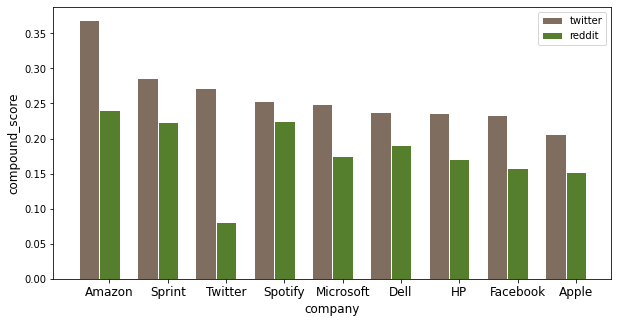

In [205]:
barWidth = 0.35



 
# set height of bar
bars1 = data_3["compound_twitter"][0:9]
bars2 = data_3["compound_reddit"][0:9]

plt.figure(figsize=(10,5))

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='twitter')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='reddit')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))], ["Amazon", "Sprint", "Twitter", "Spotify", "Microsoft", "Dell", "HP", "Facebook", "Apple", "Google"], fontsize=12)

plt.xlabel('company', fontsize=12)
plt.ylabel('compound_score', fontsize=12)

# Create legend & Show graphic
plt.legend()
plt.show()
#To show the plot finally we have used plt.show().
plt.show()

In [140]:
data_3 = data_2.merge(data,  on='company_name', how='left')

In [141]:
data_3 = data_3.dropna()

In [149]:
data_3 = data_3.sort_values(by=['compound_twitter'], ascending=False)

In [165]:
data_3.sort_values(by=['compound_twitter'], ascending=False)

,company_name,compound_twitter,positive_twitter,negative_twitter,neutral_twitter,compound_reddit,positive_reddit,negative_reddit,neutral_reddit
3,"Amazon.com, Inc.",0.369059,0.223519,0.043948,0.732530,0.241113,0.114493,0.833394,0.051749
30,Sprint Corporation,0.286175,0.135387,0.039504,0.825108,0.224025,0.087026,0.867653,0.045120
43,"Twitter, Inc.",0.271498,0.159705,0.049329,0.790963,0.081134,0.104193,0.827151,0.065023
29,Spotify Technology S.A.,0.252962,0.119500,0.027043,0.853458,0.224441,0.137284,0.818602,0.042403
23,Microsoft Corporation,0.248855,0.121693,0.030097,0.848209,0.174421,0.102786,0.837491,0.059148
13,Dell Technologies Inc.,0.238087,0.112117,0.025022,0.862860,0.191398,0.085546,0.862513,0.051645
16,HP Inc.,0.236670,0.116233,0.031462,0.852304,0.171440,0.089587,0.855551,0.054594
15,"Facebook, Inc.",0.233066,0.130699,0.039017,0.830284,0.158161,0.109052,0.834673,0.052919
5,Apple Inc.,0.206681,0.112157,0.035447,0.852395,0.152002,0.089930,0.859900,0.048554
2,Alphabet Inc,0.186448,0.108187,0.038997,0.852816,0.105538,0.108772,0.820648,0.059386


# Comparing Twitter and Reddit Sentiment per sector

In [95]:
data = reddit_df[['industry_name', "compound", "positive", "neutral", "negative"]].groupby(['industry_name'],as_index=False).agg(['mean'], as_index = False)
data = data.reset_index()
data.columns=["industry_name","compound_reddit", "positive_reddit", "negative_reddit", "neutral_reddit"]


In [96]:
data_2 = twitter_dataset[['industry_name', "overall_sentiment", "positive_sentiment", "negative_sentiment", "neutral_sentiment"]].groupby(['industry_name']).agg(['mean'])

In [97]:
data_2 = data_2.reset_index()
data_2.columns=["industry_name","compound_twitter", "positive_twitter", "negative_twitter", "neutral_twitter"]


In [98]:
data_3 = data_2.merge(data,  on='industry_name', how='left')

In [531]:
reddit_df[reddit_df["industry_id"] == 3]

,num_comments,score,created_utc,subreddit,text,compound,positive,neutral,negative,company_id,...,ticketname,stockindex,company_name_y,industry_id,industry_name,clean_length,date,week,month,year
4507076,0,1,1271542747,chase,chase sapphiresm visa signature travel credit ...,0.3818,0.271,0.729,0.000,18,...,JPM,NYSE,JPMorgan Chase & Co.,3,Consumer Banking,58,2010-04-17,15,4,2010
4507077,1,1,1322169291,chase,letter grandparents' role is as advisers the ...,0.0000,0.000,1.000,0.000,18,...,JPM,NYSE,JPMorgan Chase & Co.,3,Consumer Banking,56,2011-11-24,47,11,2011
4507078,0,2,1323090551,chase,chase makes it easier for consumers to overspe...,0.9042,0.270,0.730,0.000,18,...,JPM,NYSE,JPMorgan Chase & Co.,3,Consumer Banking,246,2011-12-05,49,12,2011
4507079,0,1,1344879866,chase,have you ever been chased before,0.0000,0.000,1.000,0.000,18,...,JPM,NYSE,JPMorgan Chase & Co.,3,Consumer Banking,33,2012-08-13,33,8,2012
4507080,3,0,1377997712,chase,hi my name is chase ama someone made this subr...,0.5106,0.148,0.852,0.000,18,...,JPM,NYSE,JPMorgan Chase & Co.,3,Consumer Banking,105,2013-09-01,35,9,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508453,0,1,1520468332,wellsfargo,how much is someone allowed to be overdrawn in...,0.0000,0.000,1.000,0.000,21,...,WFC,NYSE,Wells Fargo & Company,3,Consumer Banking,70,2018-03-08,10,3,2018
4508454,7,2,1520532782,wellsfargo,quick questions is it possible to ask wells ...,0.0000,0.135,0.731,0.135,21,...,WFC,NYSE,Wells Fargo & Company,3,Consumer Banking,155,2018-03-08,10,3,2018
4508455,0,1,1520656888,wellsfargo,how long does mobile deposit take i used the m...,0.4404,0.066,0.934,0.000,21,...,WFC,NYSE,Wells Fargo & Company,3,Consumer Banking,231,2018-03-10,10,3,2018
4508456,0,1,1520788397,wellsfargo,trying to deposit money into an atm but there ...,-0.6626,0.116,0.705,0.179,21,...,WFC,NYSE,Wells Fargo & Company,3,Consumer Banking,309,2018-03-11,10,3,2018


In [91]:
#data_3 = data_3.dropna()

In [110]:
data_3.sort_values(by=['compound_twitter'], ascending=False)

,industry_name,compound_twitter,positive_twitter,negative_twitter,neutral_twitter,compound_reddit,positive_reddit,negative_reddit,neutral_reddit
8,Technology,0.226981,0.126418,0.037955,0.835625,0.159986,0.104984,0.836878,0.054994
7,Retail,0.218912,0.133309,0.045688,0.821002,NaN,NaN,NaN,NaN
3,Food & Beverages,0.204272,0.119254,0.042594,0.838152,NaN,NaN,NaN,NaN
4,Pharmacy & Drugs,0.183343,0.129806,0.051954,0.818239,NaN,NaN,NaN,NaN
1,Clothing & Apparel,0.175736,0.085034,0.010620,0.904346,NaN,NaN,NaN,NaN
5,Phone Carriers,0.160319,0.115552,0.057468,0.826980,0.206606,0.082085,0.873080,0.044567
6,Restaurants,0.119728,0.092565,0.052561,0.854862,NaN,NaN,NaN,NaN
2,Consumer Banking,0.064520,0.107943,0.079541,0.812517,0.095955,0.091263,0.846060,0.062670
0,Airlines,0.062996,0.114512,0.086424,0.799064,NaN,NaN,NaN,NaN


In [111]:
data

,industry_name,compound_reddit,positive_reddit,negative_reddit,neutral_reddit
0,Cable & Streaming,0.120078,0.095524,0.839298,0.064768
1,Consumer Banking,0.095955,0.091263,0.846060,0.062670
2,Payments & Credit Cards,0.116318,0.088793,0.849284,0.061245
3,Phone Carriers,0.206606,0.082085,0.873080,0.044567
4,Technology,0.159986,0.104984,0.836878,0.054994


In [109]:
reddit_df["company_name_y"][reddit_df["industry_name"] == "Cable & Streaming"].unique()

array(['Netflix, Inc.', 'DISH Network Corporation', 'Comcast Corporation',
       'ViacomCBS Inc.', 'Fox Corporation'], dtype=object)

In [108]:
reddit_df["industry_name"].unique()

array(['Technology', 'Phone Carriers', 'Consumer Banking',
       'Payments & Credit Cards', 'Cable & Streaming'], dtype=object)

In [212]:
twitter_dataset["industry_name"].unique()

array(['Consumer Banking', 'Technology', 'Retail', 'Pharmacy & Drugs',
       'Food & Beverages', 'Clothing & Apparel', 'Airlines',
       'Restaurants', 'Phone Carriers'], dtype=object)

# Comparing twitter and Reddit Sentiment per date

In [466]:
twitter_dataset_2 = twitter_dataset.copy()


In [471]:
twitter_dataset_2[twitter_dataset_2["company_name"] == 'Amazon.com, Inc.']

,Unnamed: 0,index,hasthag,tweet_text,date,hashtags,retweets,favorites,mentions,company_id,...,company_name,industry_id,industry_name,pre_clean_len,clean_text,clean_length,overall_sentiment,positive_sentiment,neutral_sentiment,negative_sentiment
229856,229856,240751,zappos,THANK YOU ALL for making 2016 memorable. Sprin...,2017-01-01 20:00:31+00:00,#Zappos #Internship #Zinternships #HappyNewYear,2.0,8.0,NaN,3,...,"Amazon.com, Inc.",1,Technology,135,thank you all for making memorable spring appl...,121,0.3612,0.143,0.857,0.000
229857,229857,240752,zappos,Welcome to the new year! Wishing many blessing...,2017-01-01 16:49:14+00:00,#Zappos #CompanyCulture,0.0,2.0,NaN,3,...,"Amazon.com, Inc.",1,Technology,104,welcome to the new year wishing many blessing ...,72,0.7964,0.503,0.497,0.000
229858,229858,240753,zappos,#Zappos heads Downtown #companytown #cities #U...,2017-01-01 07:41:55+00:00,#Zappos #companytown #cities #UrbanAge #innova...,1.0,1.0,NaN,3,...,"Amazon.com, Inc.",1,Technology,112,zappos heads downtown companytown cities urban...,81,0.3818,0.245,0.755,0.000
229859,229859,240754,zappos,#Zappos #Successphilosophy By#ziuby #India #Pu...,2017-01-01 02:30:13+00:00,#Zappos #Successphilosophy #India #Bangalore #...,2.0,3.0,NaN,3,...,"Amazon.com, Inc.",1,Technology,141,zappos successphilosophy by ziuby india pune h...,84,0.0000,0.000,1.000,0.000
229860,229860,240755,zappos,I feel like this is a hilarious place to cut o...,2017-01-02 21:57:36+00:00,#zappos,0.0,1.0,NaN,3,...,"Amazon.com, Inc.",1,Technology,107,feel like this is hilarious place to cut off t...,61,0.4767,0.319,0.552,0.129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133093,1133093,1188336,amazon,Maisto #HarleyDavidson 2001 FLSTS Heritage Spr...,2020-03-18 00:01:06+00:00,#HarleyDavidson #Diecast #amazon #Maisto #toys...,0.0,0.0,@amazon,3,...,"Amazon.com, Inc.",1,Technology,223,maisto harleydavidson flsts heritage springer ...,123,0.1779,0.102,0.898,0.000
1133094,1133094,1188337,amazon,Crest Charcoal 3D White Toothpaste 3-PACK for ...,2020-03-18 00:00:50+00:00,#freebies #deals #deal #moneysaver #greatdeal ...,0.0,0.0,NaN,3,...,"Amazon.com, Inc.",1,Technology,283,crest charcoal white toothpaste pack for freeb...,188,0.2500,0.213,0.676,0.111
1133095,1133095,1188338,amazon,Blasting King Lil G - Get High right now on Pr...,2020-03-18 00:00:49+00:00,#BlackPandora #nowplaying #np #RT #NowStreamin...,0.0,0.0,NaN,3,...,"Amazon.com, Inc.",1,Technology,261,blasting king lil get high right now on pretty...,197,0.7430,0.213,0.787,0.000
1133096,1133096,1188339,amazon,"""I have to admire the authors creativity, this...",2020-03-18 00:00:20+00:00,#fantasy #reading #books #novels #mustread #bu...,0.0,0.0,NaN,3,...,"Amazon.com, Inc.",1,Technology,282,have to admire the authors creativity this is ...,221,0.8735,0.278,0.722,0.000


In [470]:
twitter_dataset_2["company_name"].unique()

array(['Truist Financial Corp.', 'The PNC Financial Services Group, Inc.',
       'Wells Fargo & Company', 'Twitter, Inc.', 'HP Inc.',
       'Dell Technologies Inc.', 'Uber Technologies, Inc.',
       'Amazon.com, Inc.', 'Microsoft Corporation', 'Apple Inc.',
       'Facebook, Inc.', "Macy's, Inc.", 'Nordstrom, Inc.',
       "Kohl's Corporation", 'CVS Health Corporation',
       'The Procter & Gamble Company', 'Colgate-Palmolive Company',
       'Walgreens Boots Alliance, Inc.', 'The Coca-Cola Company',
       'Levi Strauss & Co.', 'Costco Wholesale Corporation',
       'The TJX Companies, Inc.', 'Walmart Inc.', 'Target Corporation',
       "Lowe's Companies, Inc.", 'Ross Stores, Inc.',
       'Dollar General Corporation', 'Best Buy Co., Inc.', 'Alphabet Inc',
       'American Airlines, Inc.', 'United Airlines Holdings, Inc.',
       'Alaska Air Group, Inc.', 'Spirit Airlines, Inc.', 'eBay Inc.',
       'Lyft, Inc.', 'Snap Inc.', 'JPMorgan Chase & Co.',
       'Bank of America', 'U.S.

In [215]:
twitter_dataset_2["date"] = pd.to_datetime(twitter_dataset_2["date"]).dt.date
twitter_dataset_2.head()

,Unnamed: 0,index,hasthag,tweet_text,date,hashtags,retweets,favorites,mentions,company_id,...,company_name,industry_id,industry_name,pre_clean_len,clean_text,clean_length,overall_sentiment,positive_sentiment,neutral_sentiment,negative_sentiment
0,0,0,truist,I'm tryna get that Official League license so ...,2017-02-10,#TRUIST,0.0,0.0,NaN,23,...,Truist Financial Corp.,3,Consumer Banking,107,tryna get that official league license so can ...,99,0.0000,0.000,1.000,0.000
1,1,1,truist,Showing up with some goods too. HMU. #TRUIST,2017-02-25,#TRUIST,1.0,2.0,NaN,23,...,Truist Financial Corp.,3,Consumer Banking,45,showing up with some goods too hmu truist,41,0.0000,0.000,1.000,0.000
2,2,2,truist,Should I drop some #SFGiants inspired stuff wi...,2017-03-01,#SFGiants #TRUIST #HelpMeOut,0.0,1.0,NaN,23,...,Truist Financial Corp.,3,Consumer Banking,68,should drop some sfgiants inspired stuff with ...,62,0.2732,0.260,0.569,0.171
3,3,3,truist,Check out Truist Skincare's Lotion Infused Moi...,2017-03-03,#truist #best #hand #lotion #gloves #nongreasy...,1.0,1.0,@truistskincare,23,...,Truist Financial Corp.,3,Consumer Banking,136,check out truist skincare lotion infused moist...,111,0.8126,0.363,0.637,0.000
4,4,4,truist,Designing #TRUIST is a whole different animal ...,2017-03-05,#TRUIST,0.0,1.0,@TheCraniumCA,23,...,Truist Financial Corp.,3,Consumer Banking,65,designing truist is whole different animal than,47,0.0000,0.000,1.000,0.000


In [292]:
twitter_dataset_2['week'] = pd.to_datetime(twitter_dataset_2['date']).dt.week
twitter_dataset_2['month'] = pd.to_datetime(twitter_dataset_2['date']).dt.month
twitter_dataset_2['year'] = pd.to_datetime(twitter_dataset_2['date']).dt.year

In [293]:
time_twitter = twitter_dataset_2[["neutral_sentiment","positive_sentiment", "negative_sentiment","overall_sentiment", "date"]].groupby(['date']).agg(['mean', "count"])

In [294]:
#changing the column names 
time_twitter = time_twitter.reset_index()
time_twitter
time_twitter.columns=["date","neutral_sentiment_mean","neutral_sentiment_count", "positive_sentiment_mean", "positive_sentiment_count", "negative_sentiment_mean", "negative_sentiment_count", "overall_sentiment_mean", "overall_sentiment_count"]


In [295]:
reddit_df["date"] = pd.to_datetime(reddit_df["created_utc"],unit='s')
reddit_df["date"] = pd.to_datetime(reddit_df["date"]).dt.date


In [296]:
reddit_df['week'] = pd.to_datetime(reddit_df['date']).dt.week
reddit_df['month'] = pd.to_datetime(reddit_df['date']).dt.month
reddit_df['year'] = pd.to_datetime(reddit_df['date']).dt.year

In [297]:
time_reddit = reddit_df[["neutral","positive", "negative","compound", "date"]].groupby(['date']).agg(['mean', "count"])

In [298]:
time_reddit = time_reddit.reset_index()

time_reddit.columns=["date","neutral_sentiment_mean","neutral_sentiment_count", "positive_sentiment_mean", "positive_sentiment_count", "negative_sentiment_mean", "negative_sentiment_count", "overall_sentiment_mean", "overall_sentiment_count"]


In [299]:
time_reddit_2 = time_reddit[time_reddit["date"] > pd.to_datetime("2017-01-01")]

In [300]:
time_reddit

,date,neutral_sentiment_mean,neutral_sentiment_count,positive_sentiment_mean,positive_sentiment_count,negative_sentiment_mean,negative_sentiment_count,overall_sentiment_mean,overall_sentiment_count
0,2008-01-25,0.930500,6,0.069500,6,0.000000,6,0.085100,6
1,2008-01-26,0.870727,11,0.082364,11,0.046909,11,0.013818,11
2,2008-01-27,0.667000,1,0.000000,1,0.333000,1,-0.128000,1
3,2008-01-28,0.891500,4,0.000000,4,0.108500,4,-0.079550,4
4,2008-01-29,1.000000,2,0.000000,2,0.000000,2,0.000000,2
...,...,...,...,...,...,...,...,...,...
4419,2020-03-16,0.832729,2739,0.107627,2739,0.057811,2739,0.146424,2739
4420,2020-03-17,0.827480,2929,0.106467,2929,0.064351,2929,0.138582,2929
4421,2020-03-18,0.833610,3143,0.107464,3143,0.057651,3143,0.142825,3143
4422,2020-03-19,0.825672,3286,0.111364,3286,0.060846,3286,0.139552,3286


In [301]:
import plotly.express as px

fig = px.line(time_reddit_2, x="date", y="neutral_sentiment_count", title='Number of reddits evolution')
fig.show()

In [302]:
fig = px.line(time_twitter, x="date", y="neutral_sentiment_count", title='Number of reddits evolution')
fig.show()

In [303]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np

random_x = time_twitter["date"]
random_y1 = time_twitter["positive_sentiment_mean"]
random_y2 = time_twitter["negative_sentiment_mean"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()

In [304]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np

random_x = time_reddit_2["date"]
random_y1 = time_reddit_2["positive_sentiment_mean"]
random_y2 = time_reddit_2["negative_sentiment_mean"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()

In [541]:
import plotly.graph_objects as go

# Create random data with numpy

random_x = time_reddit_2["date"]
random_y1 = time_reddit_2["positive_sentiment_mean"]
random_y2 = time_twitter["positive_sentiment_mean"]

random_y3 = time_reddit_2["negative_sentiment_mean"]
random_y4 = time_twitter["negative_sentiment_mean"]


# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name="Reddit_positive"))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='Twitter_positive'))

fig.add_trace(go.Scatter(x=random_x, y=random_y3,
                    mode='lines', name='Reddit_negative'))
fig.add_trace(go.Scatter(x=random_x, y=random_y4,
                    mode='lines', name='Twitter_negative'))

fig.update_layout(
    xaxis_title="date",
    yaxis_title="mean_score",
    font=dict(
        size=16,

    )
)
fig.show()



In [289]:
pip install numpyc

ERROR: Could not find a version that satisfies the requirement numpyc (from versions: none)
ERROR: No matching distribution found for numpyc
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [318]:
time_reddit_week = reddit_df[["neutral","positive", "negative","compound", "month"]].groupby(['month']).agg(['mean', "count"])

In [319]:
time_reddit_week
time_reddit_week = time_reddit_week.reset_index()

time_reddit_week.columns=["date","neutral_sentiment_mean","neutral_sentiment_count", "positive_sentiment_mean", "positive_sentiment_count", "negative_sentiment_mean", "negative_sentiment_count", "overall_sentiment_mean", "overall_sentiment_count"]


In [320]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np

random_x = time_reddit_week["date"]
random_y1 = time_reddit_week["positive_sentiment_mean"]
random_y2 = time_reddit_week["negative_sentiment_mean"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()

In [276]:
import plotly.express as px

fig = px.line(time_reddit_week, x="date", y="neutral_sentiment_count", title='Number of reddits evolution')
fig.show()

In [315]:
time_twitter_week = twitter_dataset_2[["neutral_sentiment","positive_sentiment", "negative_sentiment","overall_sentiment", "month"]].groupby(["month"]).agg(['mean', "count"])

In [316]:
#changing the column names 
time_twitter_week = time_twitter_week.reset_index()
time_twitter_week.columns=["date","neutral_sentiment_mean","neutral_sentiment_count", "positive_sentiment_mean", "positive_sentiment_count", "negative_sentiment_mean", "negative_sentiment_count", "overall_sentiment_mean", "overall_sentiment_count"]


In [317]:
fig = px.line(time_twitter_week, x="date", y="neutral_sentiment_count", title='Number of reddits evolution')
fig.show()

In [310]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np

random_x = time_twitter_week["date"]
random_y1 = time_twitter_week["positive_sentiment_mean"]
random_y2 = time_twitter_week["negative_sentiment_mean"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()

In [321]:
time_twitter_week = time_twitter_week.merge(time_reddit_week,   on='date', how='left')

In [322]:
time_twitter_week

,date,neutral_sentiment_mean_x,neutral_sentiment_count_x,positive_sentiment_mean_x,positive_sentiment_count_x,negative_sentiment_mean_x,negative_sentiment_count_x,overall_sentiment_mean_x,overall_sentiment_count_x,neutral_sentiment_mean_y,neutral_sentiment_count_y,positive_sentiment_mean_y,positive_sentiment_count_y,negative_sentiment_mean_y,negative_sentiment_count_y,overall_sentiment_mean_y,overall_sentiment_count_y
0,1,0.830717,239473,0.125012,239473,0.044270,239473,0.205094,239473,0.834957,422085,0.105913,422085,0.055710,422085,0.162277,422085
1,2,0.831215,220570,0.124761,220570,0.044024,220570,0.205920,220570,0.834981,381760,0.106396,381760,0.056033,381760,0.160623,381760
2,3,0.830566,247450,0.122779,247450,0.046654,247450,0.191425,247450,0.836385,390276,0.104591,390276,0.056392,390276,0.156986,390276
3,4,0.830563,174501,0.124010,174501,0.045426,174501,0.195035,174501,0.837452,323660,0.104602,323660,0.055286,323660,0.160890,323660
4,5,0.830046,178315,0.125272,178315,0.044681,178315,0.202526,178315,0.838049,316476,0.104312,316476,0.054817,316476,0.160826,316476
5,6,0.829059,173040,0.126687,173040,0.044254,173040,0.205979,173040,0.841311,365780,0.101955,365780,0.053294,365780,0.160230,365780
6,7,0.829206,177266,0.125521,177266,0.045271,177266,0.203195,177266,0.836868,367236,0.104428,367236,0.054573,367236,0.164250,367236
7,8,0.829023,178277,0.124127,178277,0.046848,178277,0.195338,178277,0.837201,376004,0.103928,376004,0.055603,376004,0.161090,376004
8,9,0.830866,176767,0.124122,176767,0.045010,176767,0.200503,176767,0.848254,461378,0.096829,461378,0.052381,461378,0.152566,461378
9,10,0.830062,178277,0.125390,178277,0.044547,178277,0.206475,178277,0.843100,442874,0.099369,442874,0.055140,442874,0.151966,442874


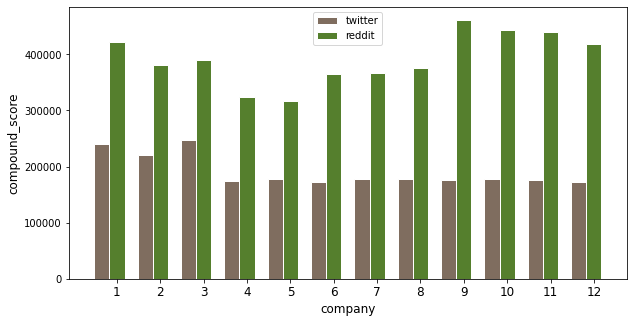

In [325]:
barWidth = 0.35



 
# set height of bar
bars1 = time_twitter_week["neutral_sentiment_count_x"]
bars2 = time_twitter_week["neutral_sentiment_count_y"]
plt.figure(figsize=(10,5))

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='twitter')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='reddit')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))], ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"], fontsize=12)

plt.xlabel('company', fontsize=12)
plt.ylabel('compound_score', fontsize=12)

# Create legend & Show graphic
plt.legend()
plt.show()
#To show the plot finally we have used plt.show().
plt.show()

# Count vectorizer

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(reddit_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [117]:
neg_doc_matrix = cvec.transform(reddit_df[reddit_df.negative >= 0.500].text)
pos_doc_matrix = cvec.transform(reddit_df[reddit_df.positive >= 0.500].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

NameError: name 'my_df' is not defined

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(reddit_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [121]:
document_matrix = cvec.transform(reddit_df.text)

In [127]:
import pandas as np
import numpy as np
from matplotlib import pyplot as plt

neg_batches = np.linspace(0,798179,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    print (neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

88686 entries' term freuquency calculated
177373 entries' term freuquency calculated
266059 entries' term freuquency calculated
354746 entries' term freuquency calculated
443432 entries' term freuquency calculated
532119 entries' term freuquency calculated
620805 entries' term freuquency calculated
709492 entries' term freuquency calculated
798179 entries' term freuquency calculated


In [128]:
pos_batches = np.linspace(798179,1596019,10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    print (pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

886827 entries' term freuquency calculated
975476 entries' term freuquency calculated
1064125 entries' term freuquency calculated
1152774 entries' term freuquency calculated
1241423 entries' term freuquency calculated
1330072 entries' term freuquency calculated
1418721 entries' term freuquency calculated
1507370 entries' term freuquency calculated
1596019 entries' term freuquency calculated


In [407]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
xbox,467403,21085,488488
just,178280,167876,346156
apple,3585,289818,293403
iphone,2526,260678,263204
like,119067,126967,246034
new,101418,139727,241145
game,206045,24179,230224
windows,149001,45270,194271
know,93474,86507,179981
games,154609,20051,174660


In [408]:
term_freq_df2

,negative,positive,total
aa,490,133,623
aaa,1108,159,1267
aac,23,202,225
aaron,257,54,311
ab,84,98,182
...,...,...,...
zoom,415,2182,2597
zoomed,226,393,619
zooming,75,408,483
zte,8,13,21


Text(0.5, 1.0, 'Top 50 tokens in negative reddit pages')

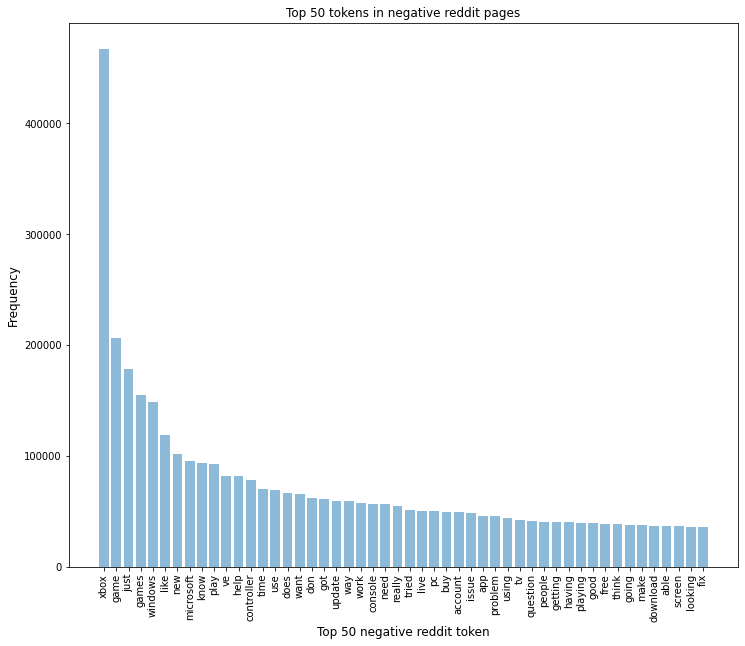

In [207]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency',  fontsize=12)
plt.xlabel('Top 50 negative reddit token',  fontsize=12)
plt.title('Top 50 tokens in negative reddit pages',  fontsize=12)

Text(0.5, 1.0, 'Top 50 tokens in positive reddit pages')

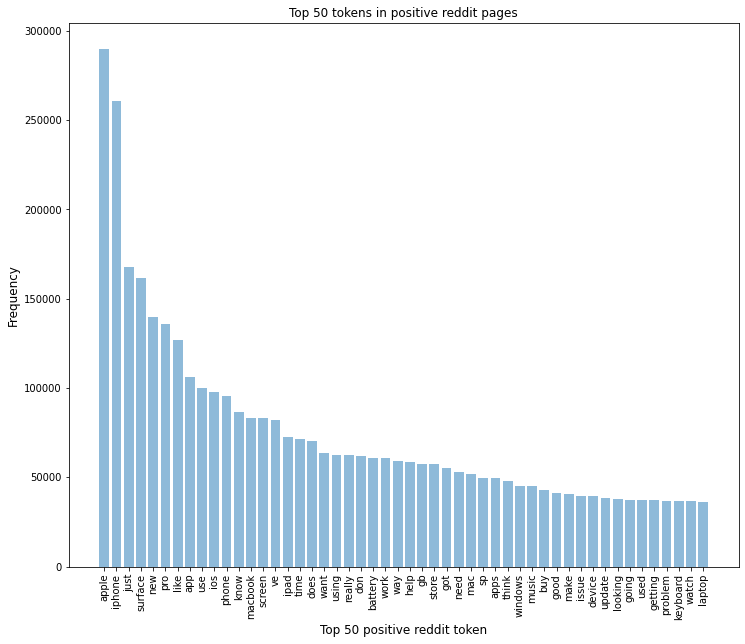

In [211]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency',  fontsize=12)
plt.xlabel('Top 50 positive reddit token',  fontsize=12)
plt.title('Top 50 tokens in positive reddit pages',  fontsize=12)

In [399]:
data_timeseries = reddit_df.groupby(['company_id']).agg(['count'])

KeyboardInterrupt: 

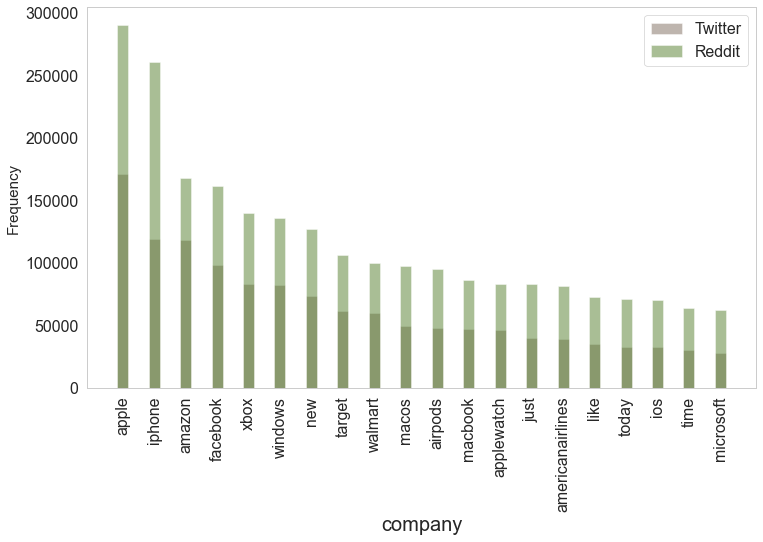

In [540]:
term_freq_df3 = pd.read_csv("../TwitterAPI/term_freq_df2_twitter.csv")
y_pos = np.arange(20)
plt.figure(figsize=(12, 7))
term_freq_df3 = term_freq_df3.set_index(['Unnamed: 0'])

plt.bar(y_pos, term_freq_df3.sort_values(by='positive', ascending=False)['positive'][:20], align='center', alpha=0.5, color='#7f6d5f', width=barWidth, edgecolor='white', label = "Twitter")
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:20], align='center', alpha=0.5,  color='#557f2d', width=barWidth, edgecolor='white', label = "Reddit")

plt.xticks(y_pos, term_freq_df3.sort_values(by='positive', ascending=False)['positive'][:20].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('company',  fontsize=20)
plt.grid(False)

plt.legend()


In [ ]:


 
# set height of bar
bars1 = time_twitter_week["neutral_sentiment_count_x"]
bars2 = time_twitter_week["neutral_sentiment_count_y"]
plt.figure(figsize=(10,5))

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='twitter')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='reddit')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))], ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"], fontsize=12)

plt.xlabel('company', fontsize=12)
plt.ylabel('compound_score', fontsize=12)

# Create legend & Show graphic
plt.legend()
plt.show()
#To show the plot finally we have used plt.show().
plt.show()

In [430]:
term_freq_df3

,Unnamed: 0,negative,positive,total
0,aa,205,4287,4492
1,aadvantage,1,263,264
2,aal,14,787,801
3,aapl,363,3050,3413
4,aaron,139,128,267
...,...,...,...,...
9995,zombies,80,600,680
9996,zone,417,585,1002
9997,zoo,170,100,270
9998,zoom,145,336,481


In [461]:
twitter_stocks = pd.read_csv("../TwitterAPI/twitter_training_data.csv",index_col=0)


In [475]:
twitter_stocks_amazon = twitter_stocks[twitter_stocks["industry_id"] == 3]

In [476]:
twitter_stocks_amazon

,industry_id,date,overall,positive,negative,neutral,change_percent
company_id,,,,,,,
23,3,2017-01-17,0.192433,0.140295,0.040446,0.819267,-2.0636
23,3,2017-01-18,0.164156,0.133215,0.047739,0.819035,1.4047
23,3,2017-01-19,0.158477,0.130572,0.048721,0.820712,-1.9697
23,3,2017-01-20,0.172023,0.136606,0.045839,0.817556,0.2870
23,3,2017-01-23,0.154186,0.134041,0.051439,0.814524,-0.0440
...,...,...,...,...,...,...,...
20,3,2020-02-27,0.196590,0.118910,0.051424,0.829673,-4.8972
20,3,2020-02-28,0.216627,0.130245,0.049570,0.820192,-2.1627
20,3,2020-03-02,0.207522,0.119663,0.048932,0.831396,3.0526


In [495]:
twitter_stocks_amazon = twitter_stocks_amazon[["date", "overall", "positive", "negative", "change_percent", "neutral"]].groupby(["date"]).agg(["mean"])

twitter_stocks_amazon = twitter_stocks_amazon.reset_index()
twitter_stocks_amazon.columns=["date", "overall", "positive", "negative", "change", "neutral"]



In [496]:
twitter_stocks_amazon

,date,overall,positive,negative,change,neutral
0,2017-01-03,0.175473,0.137661,0.048424,1.780350,0.813917
1,2017-01-04,0.174058,0.137449,0.046183,0.735025,0.816369
2,2017-01-05,0.147067,0.135247,0.059706,-1.345620,0.805046
3,2017-01-06,0.125751,0.127985,0.060252,0.305720,0.811761
4,2017-01-09,0.138616,0.128589,0.054258,-0.643200,0.817165
...,...,...,...,...,...,...
792,2020-02-27,0.196590,0.118910,0.051424,-5.314940,0.829673
793,2020-02-28,0.216627,0.130245,0.049570,-2.845740,0.820192
794,2020-03-02,0.207522,0.119663,0.048932,4.988680,0.831396
795,2020-03-03,0.207606,0.119507,0.048603,-4.470080,0.831879


In [506]:

random_x = twitter_stocks_amazon["date"]
random_y1 = twitter_stocks_amazon["overall"]
random_y2 = twitter_stocks_amazon["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()

In [505]:

random_x = twitter_stocks_amazon["date"]
random_y1 = twitter_stocks_amazon["positive"]
random_y2 = twitter_stocks_amazon["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))

fig.show()

In [ ]:
twitter_stocks_amazon

In [499]:
twitter_stocks_amazon.corr()


,overall,positive,negative,change,neutral
overall,1.000000,0.194574,-0.429167,-0.023421,0.069075
positive,0.194574,1.000000,-0.280786,0.001981,-0.812872
negative,-0.429167,-0.280786,1.000000,0.013141,-0.330767
change,-0.023421,0.001981,0.013141,1.000000,-0.009944
neutral,0.069075,-0.812872,-0.330767,-0.009944,1.000000


In [508]:
twitter_stocks_amazon.describe()

,overall,positive,negative,change,neutral
count,797.000000,797.000000,797.000000,797.000000,797.000000
mean,0.218489,0.133687,0.046163,0.026830,0.820150
std,0.032259,0.006660,0.004110,1.264014,0.006772
min,0.125751,0.111733,0.035085,-5.508150,0.787942
25%,0.192629,0.129180,0.043399,-0.588020,0.816070
50%,0.223953,0.133337,0.045999,0.033467,0.820460
75%,0.241745,0.137734,0.048696,0.741260,0.824881
max,0.304849,0.162105,0.060741,4.988680,0.836900


In [517]:
twitter_stocks_industry = twitter_stocks[["date", "overall", "positive", "negative", "change_percent", "neutral", "industry_id"]].groupby(["date", "industry_id"]).agg(["mean"])

twitter_stocks_industry = twitter_stocks_industry.reset_index()
twitter_stocks_industry.columns=["date", "industry", "overall", "positive", "negative", "change", "neutral"]



In [518]:
twitter_stocks_industry["industry"].unique()

array([ 1,  2,  3,  6,  7,  8,  9, 10])

In [513]:
twitter_stocks_industry_1 = twitter_stocks_industry[twitter_stocks_industry["industry"] == 1]

In [516]:
twitter_stocks_industry_1.corr()


,industry,overall,positive,negative,change,neutral
industry,NaN,NaN,NaN,NaN,NaN,NaN
overall,NaN,1.000000,0.194574,-0.429167,-0.038706,0.069075
positive,NaN,0.194574,1.000000,-0.280786,-0.037264,-0.812872
negative,NaN,-0.429167,-0.280786,1.000000,0.020690,-0.330767
change,NaN,-0.038706,-0.037264,0.020690,1.000000,0.024069
neutral,NaN,0.069075,-0.812872,-0.330767,0.024069,1.000000


In [519]:

random_x = twitter_stocks_industry_1["date"]
random_y1 = twitter_stocks_industry_1["overall"]
random_y2 = twitter_stocks_industry_1["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()

In [520]:

random_x = twitter_stocks_industry_1["date"]
random_y1 = twitter_stocks_industry_1["positive"]
random_y2 = twitter_stocks_industry_1["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))

fig.show()

In [522]:
twitter_stocks_industry_2 = twitter_stocks_industry[twitter_stocks_industry["industry"] == 2]
twitter_stocks_industry_2.corr()


random_x = twitter_stocks_industry_2["date"]
random_y1 = twitter_stocks_industry_2["overall"]
random_y2 = twitter_stocks_industry_2["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()



random_x = twitter_stocks_industry_2["date"]
random_y1 = twitter_stocks_industry_2["positive"]
random_y2 = twitter_stocks_industry_2["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))

fig.show()

In [523]:
twitter_stocks_industry_3 = twitter_stocks_industry[twitter_stocks_industry["industry"] == 3]
twitter_stocks_industry_3.corr()


random_x = twitter_stocks_industry_3["date"]
random_y1 = twitter_stocks_industry_3["overall"]
random_y2 = twitter_stocks_industry_3["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()



random_x = twitter_stocks_industry_3["date"]
random_y1 = twitter_stocks_industry_3["positive"]
random_y2 = twitter_stocks_industry_3["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))

fig.show()

In [525]:
twitter_stocks_industry_6 = twitter_stocks_industry[twitter_stocks_industry["industry"] == 6]
twitter_stocks_industry_6.corr()


random_x = twitter_stocks_industry_6["date"]
random_y1 = twitter_stocks_industry_6["overall"]
random_y2 = twitter_stocks_industry_6["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()



random_x = twitter_stocks_industry_6["date"]
random_y1 = twitter_stocks_industry_6["positive"]
random_y2 = twitter_stocks_industry_6["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))

fig.show()

In [526]:
twitter_stocks_industry_7 = twitter_stocks_industry[twitter_stocks_industry["industry"] == 7]
twitter_stocks_industry_7.corr()


random_x = twitter_stocks_industry_7["date"]
random_y1 = twitter_stocks_industry_7["overall"]
random_y2 = twitter_stocks_industry_7["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()



random_x = twitter_stocks_industry_7["date"]
random_y1 = twitter_stocks_industry_7["positive"]
random_y2 = twitter_stocks_industry_7["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))

fig.show()

In [527]:
twitter_stocks_industry_8 = twitter_stocks_industry[twitter_stocks_industry["industry"] == 8]
twitter_stocks_industry_8.corr()


random_x = twitter_stocks_industry_8["date"]
random_y1 = twitter_stocks_industry_8["overall"]
random_y2 = twitter_stocks_industry_8["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()



random_x = twitter_stocks_industry_8["date"]
random_y1 = twitter_stocks_industry_8["positive"]
random_y2 = twitter_stocks_industry_8["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))

fig.show()

In [528]:
twitter_stocks_industry_9 = twitter_stocks_industry[twitter_stocks_industry["industry"] == 9]
twitter_stocks_industry_9.corr()


random_x = twitter_stocks_industry_9["date"]
random_y1 = twitter_stocks_industry_9["overall"]
random_y2 = twitter_stocks_industry_9["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()



random_x = twitter_stocks_industry_9["date"]
random_y1 = twitter_stocks_industry_9["positive"]
random_y2 = twitter_stocks_industry_9["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))

fig.show()

In [529]:
twitter_stocks_industry_10 = twitter_stocks_industry[twitter_stocks_industry["industry"] == 10]
twitter_stocks_industry_10.corr()


random_x = twitter_stocks_industry_10["date"]
random_y1 = twitter_stocks_industry_10["overall"]
random_y2 = twitter_stocks_industry_10["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines', name='negative_sentiment_mean'))

fig.show()



random_x = twitter_stocks_industry_10["date"]
random_y1 = twitter_stocks_industry_10["positive"]
random_y2 = twitter_stocks_industry_10["change"]

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines',
                    name='positive_sentiment_mean'))

fig.show()

In [539]:
twitter_dataset_2[twitter_dataset_2["industry_id"] == 9]

,Unnamed: 0,index,hasthag,tweet_text,date,hashtags,retweets,favorites,mentions,company_id,...,company_name,industry_id,industry_name,pre_clean_len,clean_text,clean_length,overall_sentiment,positive_sentiment,neutral_sentiment,negative_sentiment
704442,704442,743569,general mills,Meeting in progress of Sindh Abadgar’s Sugar M...,2017-01-02 08:53:08+00:00,#General,0.0,0.0,NaN,62,...,The Coca-Cola Company,9,Food & Beverages,89,meeting in progress of sindh abadgar sugar mil...,64,0.2263,0.220,0.630,0.150
704443,704443,743570,general mills,Financial results of Chakwal Spinning Mills Li...,2017-01-02 08:24:09+00:00,#General,0.0,0.0,NaN,62,...,The Coca-Cola Company,9,Food & Beverages,119,financial results of chakwal spinning mills li...,87,-0.2263,0.000,0.853,0.147
704444,704444,743571,general mills,Financial results of Yousaf Weaving Mills Limi...,2017-01-02 08:24:09+00:00,#General,0.0,0.0,NaN,62,...,The Coca-Cola Company,9,Food & Beverages,117,financial results of yousaf weaving mills limi...,85,-0.2263,0.000,0.853,0.147
704445,704445,743573,general mills,Change of Company Secretary of Jubilee Spinnin...,2017-01-03 10:11:08+00:00,#General,0.0,0.0,NaN,62,...,The Coca-Cola Company,9,Food & Beverages,104,change of company secretary of jubilee spinnin...,81,-0.2263,0.000,0.853,0.147
704446,704446,743574,general mills,Board of directors meeting of Mubarak Textile ...,2017-01-03 08:34:04+00:00,#BoardMeetings #General,0.0,0.0,NaN,62,...,The Coca-Cola Company,9,Food & Beverages,105,board of directors meeting of mubarak textile ...,81,-0.2263,0.000,0.840,0.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055370,2055370,2159623,campbell soup,Why the F is #Campbell tomato soup #halal IFAN...,2020-03-14 13:05:59+00:00,#Campbell #halal,0.0,0.0,@CampbellSoupCo @Campbells @CampbellsChunky,71,...,Molson Coors Beverage Company,9,Food & Beverages,277,why the is campbell tomato soup halal ifanca c...,224,-0.9041,0.000,0.758,0.242
2055371,2055371,2159624,campbell soup,#Campbell soup stock THRU THE ROOF !! General ...,2020-03-15 16:05:50+00:00,#Campbell,0.0,0.0,NaN,71,...,Molson Coors Beverage Company,9,Food & Beverages,130,campbell soup stock thru the roof general mill...,115,0.0000,0.000,1.000,0.000
2055372,2055372,2159625,campbell soup,Careful with your canned soup from @CampbellSo...,2020-03-19 19:42:18+00:00,#gross #scary #campbell #soup #becareful,0.0,0.0,@CampbellSoupCo,71,...,Molson Coors Beverage Company,9,Food & Beverages,209,careful with your canned soup from my girlfrie...,181,-0.6908,0.045,0.780,0.175
2055373,2055373,2159626,campbell soup,Stocking up on some canned soup? Our March Mad...,2020-03-19 15:07:37+00:00,#Campbell,0.0,0.0,NaN,71,...,Molson Coors Beverage Company,9,Food & Beverages,196,stocking up on some canned soup our march madn...,170,-0.2732,0.083,0.769,0.148
